In [9]:
import pandas as pd
import os
import shutil
import numpy as np
import cv2

In [10]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 
import json

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(1,1))
    plt.imshow(out)
    plt.show()

### Color Map

In [12]:
map_v2n = {'w':0,'y':1,'b':2,'g':3,'r':4,'o':5}
map_n2v = [k for k in map_v2n.keys()]
map_n2v

['w', 'y', 'b', 'g', 'r', 'o']

### Read the Data

In [13]:
data = json.load(open("files2/data.json"))

In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

label_n label_v                        color
0        4       r  [78.1425, 91.005, 215.9475]
1        3       g   [91.3925, 181.885, 76.945]
2        5       o  [84.105, 144.2025, 254.235]
3        5       o   [109.635, 169.175, 254.37]
4        0       w    [218.29, 220.36, 216.835]

In [16]:
# np.array(list(df["color"]))

In [17]:
# np.array(df["label_n"])

### Create Dataset for training

In [18]:
# Assign values to the X and y variables:
X = np.array(list(df["color"]))
y = np.array(df["label_n"])

# Split dataset into random train and test subsets:
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.15) 

In [19]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler().fit(X_train_o)

In [20]:
X_train = scaler.transform(X_train_o)
X_test = scaler.transform(X_test_o)

In [21]:
X_train.shape

(765, 3)

In [22]:
X_train[0], X_train_o[0]

(array([-0.35706653,  0.90922372,  0.58100873]),
 array([125.885, 223.335, 228.495]))

In [23]:
scaler.var_ == X_train_o.var(axis=0), scaler.mean_ == X_train_o.mean(axis=0)

(array([ True,  True,  True]), array([ True,  True,  True]))

### KNeighborsClassifier

In [24]:
# Use the KNN classifier to fit data:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = knn_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[29  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        26

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



### SVM

In [25]:
# Use the SVC classifier to fit data:
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = svc_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[29  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        26

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



### Näive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
# Use the GaussianNB classifier to fit data:
nbc_classifier = GaussianNB()
nbc_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = nbc_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[29  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  1 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        29
           4       0.96      1.00      0.98        22
           5       1.00      0.96      0.98        26

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Use the Decision Tree classifier to fit data:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = dt_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[29  0  0  0  0  0]
 [ 1 12  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  1 28  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        16
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        26

    accuracy                           0.99       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.99      0.99      0.99       135



### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Use the Decision Tree classifier to fit data:
rfc_classifier = RandomForestClassifier()
rfc_classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = rfc_classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[29  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        26

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## Saving the Models

In [29]:
import pickle

knnf = 'files2/models/knn.sk.model'
svmf = 'files2/models/svm.sk.model'
nbcf = 'files2/models/nbc.sk.model'
dtcf = 'files2/models/dtc.sk.model'
rfcf = 'files2/models/rfc.sk.model'

In [30]:
pickle.dump(knn_classifier, open(knnf, 'wb'))
pickle.dump(svc_classifier, open(svmf, 'wb'))
pickle.dump(nbc_classifier, open(nbcf, 'wb'))
pickle.dump(dt_classifier, open(dtcf, 'wb'))
pickle.dump(rfc_classifier, open(rfcf, 'wb'))

## Validation

In [31]:
import pickle

knnf = 'files2/models/knn.sk.model'
svmf = 'files2/models/svm.sk.model'
nbcf = 'files2/models/nbc.sk.model'
dtcf = 'files2/models/dtc.sk.model'
rfcf = 'files2/models/rfc.sk.model'

In [32]:
def predict(clf, sample):
    cl = pickle.load(open(clf, 'rb'))
    v = scaler.transform([sample])
    
    print(cl.predict_proba(v))
    print(map_n2v[int(cl.predict(v))])
    
    pix = np.array([np.array([np.array([sample[2],sample[1],sample[0]]).astype(int)])])    
    plt.imshow(pix)
    print(pix)
    plt.show()
    return cl

In [33]:
X_test_o[0]

array([202.2125, 205.7725, 200.5325])

[[1. 0. 0. 0. 0. 0.]]
w
[[[200 205 202]]]


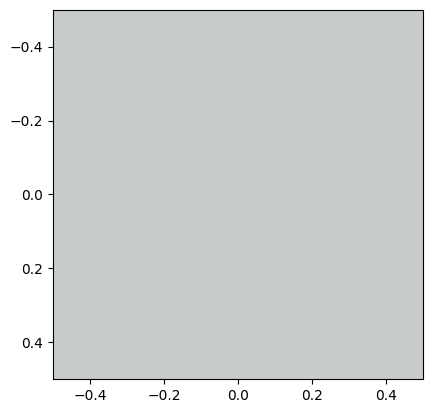

DecisionTreeClassifier()

In [34]:
predict(dtcf, X_test_o[0])

[[0. 0. 0. 1. 0. 0.]]
g
[[[  0 255   0]]]


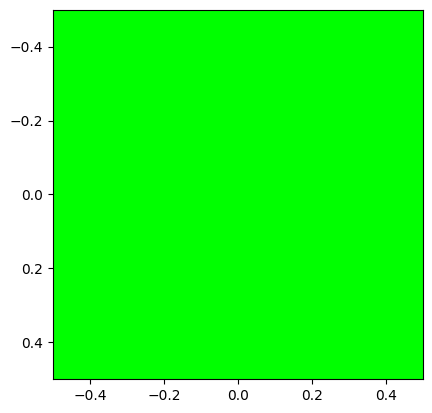

DecisionTreeClassifier()

In [35]:
predict(dtcf, [0,255,0])

[[0. 0. 1. 0. 0. 0.]]
b
[[[  0   0 255]]]


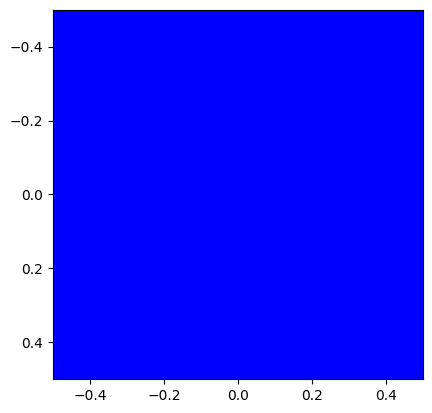

DecisionTreeClassifier()

In [36]:
predict(dtcf, [255,0,0])

[[0. 0. 0. 0. 1. 0.]]
r
[[[255   0   0]]]


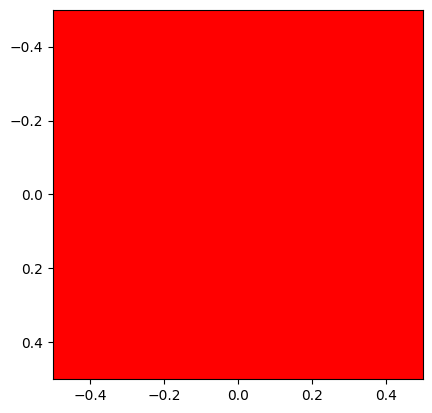

In [37]:
cl = predict(dtcf, [0,0,255])

[[0. 0. 0. 0. 1. 0.]]
r
[[[255 105   0]]]


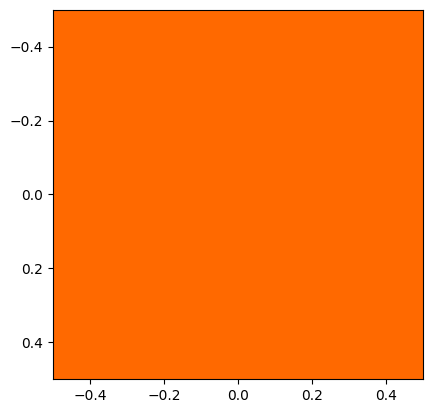

KNeighborsClassifier(n_neighbors=6)

In [38]:
predict(knnf, [0,105,255])

[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= -0.27\ngini = 0.833\nsamples = 765\nvalue = [123, 136, 135, 117, 127, 127]'),
 Text(0.2222222222222222, 0.75, 'x[1] <= -0.186\ngini = 0.497\nsamples = 252\nvalue = [0, 0, 135, 117, 0, 0]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 135\nvalue = [0, 0, 135, 0, 0, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 117\nvalue = [0, 0, 0, 117, 0, 0]'),
 Text(0.6666666666666666, 0.75, 'x[1] <= -0.711\ngini = 0.75\nsamples = 513\nvalue = [123, 136, 0, 0, 127, 127]'),
 Text(0.5555555555555556, 0.5833333333333334, 'gini = 0.0\nsamples = 127\nvalue = [0, 0, 0, 0, 127, 0]'),
 Text(0.7777777777777778, 0.5833333333333334, 'x[0] <= 0.781\ngini = 0.666\nsamples = 386\nvalue = [123, 136, 0, 0, 0, 127]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[1] <= 0.601\ngini = 0.499\nsamples = 263\nvalue = [0, 136, 0, 0, 0, 127]'),
 Text(0.5555555555555556, 0.25, 'x[2] <= 0.564\ngini = 0.031\nsamples 

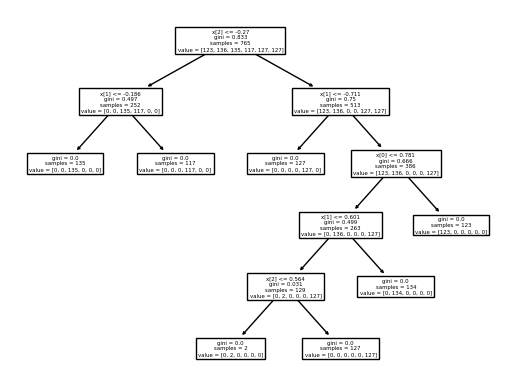

In [39]:
from sklearn import tree
tree.plot_tree(cl)

In [40]:
import graphviz 
dot_data = tree.export_graphviz(cl, out_file=None, 
                     class_names= map_n2v,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph  

ModuleNotFoundError: No module named 'graphviz'